# Árvores de Decisão

- Escolher uma base de dados para análise.
- Fazer classificação dos dados utilizando árvore de decisão.
- Faça análise de desempenho da solução:
 - métricas de desempenho (acurácia, recall, ROC, …) 
 - critério (Gini, Entropia, ...)
 - técnicas de treinamento (validação cruzada, …)
- Apresente os resultados com conclusões em 5 minutos.


## Treinamento

In [16]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import random

from sklearn import datasets

In [ ]:
#idv2 74:48 - 94:25 --- 74.8 - 94.42
#idv7 138:23 -142:02 --- 138.38333 - 142.03
#idv6 196:56 - 212:01 --- 196.93 ---212.016


In [63]:
data = pd.read_csv("heart.csv")
random.shuffle(data.columns.values[0:-1])


In [64]:
data

,ca,restecg,age,slope,fbs,trestbps,cp,chol,oldpeak,thal,sex,exang,thalach,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[0:-1]], data['target'], test_size=0.3, train_size=0.7)

{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 3}
0.8349514563106797
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.84      0.83      0.83        52

   micro avg       0.81      0.81      0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



/home/rute/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


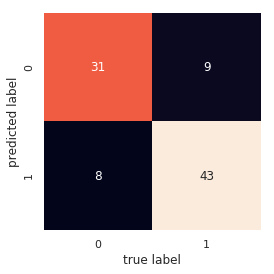

In [69]:
# Load data
#data = datasets.load_breast_cancer()
target_names = [0, 1]

# Cross Validation
model = DecisionTreeClassifier()

steps = [
#   Prepocessing
##  Calculate slopes
#   ('slope', estimate_slopes),
##  Feature Selection
#   ('feat_sel', feat_sel),
    ('decision_tree', model)
]
pipe = Pipeline(steps)

pipe_params = {
#     'slope__n': range(3, 21), # 2 < n <= 20, equivalente a 12 minutos
    'decision_tree__max_depth': range(1, 11),
    'decision_tree__criterion': ['gini', 'entropy']
}

grid_cv = GridSearchCV(pipe, param_grid=pipe_params, cv=10, scoring='f1')
grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_
y_pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [38]:
y_train.value_counts()

163    7
160    7
162    7
132    6
144    6
150    6
152    6
125    5
172    5
169    5
173    5
158    5
147    4
159    4
157    4
151    4
140    4
154    4
122    4
178    4
182    4
171    4
131    3
143    3
142    3
141    3
153    3
179    3
155    3
145    3
      ..
149    2
148    2
115    1
105    1
106    1
121    1
108    1
118    1
113    1
97     1
88     1
96     1
202    1
127    1
177    1
194    1
187    1
186    1
185    1
184    1
181    1
167    1
128    1
164    1
195    1
139    1
138    1
137    1
134    1
71     1
Name: target, Length: 80, dtype: int64